# COVID-19 in Prisons

This notebook pulls together data from the the UCLA COVID-19 Behind Bars dataset, the Bureau of Justice Statistics, and the Marshall Project's dataset tracking COVID-19 infections in staff and inmates. We then prepare the data for machine learning analysis. 

## SECTION I: Identifying Prison Conditions and Infections/Deaths by State


From the UCLA COVID-19 Behind Bars dataset, identifying and cleaning the policies prisons have put in place to align with social distance recommendations, and support prisoner mental health as a result of the isolation. From the same dataset, identifying the pre-COVID-19 incarcerated population. From the Bureau of Justice Statistics, identifying prison capacity (as of 2018) and incarcerated population (as of 2018). 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import re
import prison_conditions_wrangle as pcw
import clean_data

### First, extracting the prison population of each state prior to any COVID-19 releases.

In [3]:
#Read in the data
population = pcw.import_clean_data('../data/may_19/ucla_0519_COVID19_related_prison_releases.csv')

population.head(5)

,state,facility,authorizing_agent,known_capacity_\n(if_available),population_prior_to_releases,overall_pop._reduction_/_\ntotal_number_of_releases,does_the_source_report_this_reduction_as_a_result_of_releases_only_or_a_mix_of_releases/policy_changes,does_the_source_give_a_more_detailed_breakdown_on_the_releases,breakdown_of_releases:\nparole_tech_violation_,breakdown_of_releases:\nlower_level/_non-violent_crimes,breakdown_of_releases:_\nshort_time_left_on_sentence,breakdown_of_releases:\nvulnerable_populations,breakdown_of_releases:_\nother_(please_explain),date,legal_filing,source(s),"additional_notes_(explaining_""other""_column,_defining_vulnerable_populations_in_this_instance,_etc.)",unnamed:_17,unnamed:_18,unnamed:_19
0,NaN,NaN,NaN,NaN,623877,24356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,Statewide,Governor,NaN,NaN,Unknown,Releases only,Yes - See columns I-M,x,NaN,NaN,NaN,x,2020-04-02,No,https://www.wsfa.com/2020/04/02/ivey-order-all...,County jail releases only (no prisons); focus ...,NaN,NaN,NaN
2,Arkansas,Statewide,Parole Board/Gov,NaN,NaN,300,Releases only,No,NaN,NaN,NaN,NaN,x,2020-05-12,NaN,https://www.nwahomepage.com/lifestyle/health/c...,First 300 released. 1234 approved by Parole Bo...,NaN,NaN,NaN
3,California,Statewide,CDCR,NaN,114000,3418,Releases only,Yes - See columns I-M,NaN,x,x,NaN,NaN,2020-04-13,Yes,https://www.courtlistener.com/recap/gov.uscour...,This is a declaration opposing further relief ...,NaN,NaN,NaN
4,Colorado,Statwide,Governor,NaN,20000,3500,Mix,Yes - See columns I-M,NaN,NaN,x,x,NaN,2020-04-23,No,https://www.cpr.org/2020/04/23/colorado-correc...,150 people released due to early release for m...,NaN,NaN,NaN


In [4]:
population = population.dropna(subset=["state", "population_prior_to_releases"])
population = pcw.clean_str_cols(population, ["state"])
population = pcw.clean_numeric_cols(population, ["population_prior_to_releases"])
population.shape

(22, 20)

In [5]:
population.head()

,state,facility,authorizing_agent,known_capacity_\n(if_available),population_prior_to_releases,overall_pop._reduction_/_\ntotal_number_of_releases,does_the_source_report_this_reduction_as_a_result_of_releases_only_or_a_mix_of_releases/policy_changes,does_the_source_give_a_more_detailed_breakdown_on_the_releases,breakdown_of_releases:\nparole_tech_violation_,breakdown_of_releases:\nlower_level/_non-violent_crimes,breakdown_of_releases:_\nshort_time_left_on_sentence,breakdown_of_releases:\nvulnerable_populations,breakdown_of_releases:_\nother_(please_explain),date,legal_filing,source(s),"additional_notes_(explaining_""other""_column,_defining_vulnerable_populations_in_this_instance,_etc.)",unnamed:_17,unnamed:_18,unnamed:_19
3,california,Statewide,CDCR,NaN,114000.0,3418,Releases only,Yes - See columns I-M,NaN,x,x,NaN,NaN,2020-04-13,Yes,https://www.courtlistener.com/recap/gov.uscour...,This is a declaration opposing further relief ...,NaN,NaN,NaN
4,colorado,Statwide,Governor,NaN,20000.0,3500,Mix,Yes - See columns I-M,NaN,NaN,x,x,NaN,2020-04-23,No,https://www.cpr.org/2020/04/23/colorado-correc...,150 people released due to early release for m...,NaN,NaN,NaN
6,federal bop,Nationwide,AG,NaN,174000.0,1440,Releases only,Yes - See columns I-M,NaN,x,NaN,x,NaN,2020-04-22,No,https://www.politico.com/amp/news/2020/04/22/c...,Number as of 4.22.20; (As of 4/6/20: 886 had...,NaN,NaN,NaN
9,hawaii,statewide,courts,NaN,2189.0,823,Releases only,No,NaN,NaN,NaN,NaN,NaN,2020-05-09,Yes,https://www.staradvertiser.com/2020/05/09/hawa...,This article reports a reduction of 832. Anoth...,afc,NaN,NaN
10,illinois,Decatur,NaN,NaN,NaN,6,Releases only,Yes - See columns I-M,NaN,NaN,NaN,NaN,x,2020-03-29,NaN,https://www.chicagotribune.com/coronavirus/ct-...,Mothers and newborns,NaN,NaN,NaN


In [6]:
#Select on the necessary columns; drop any rows that don't have a population
prison_pop = pcw.select_columns(population, features=["state", "population_prior_to_releases"])
prison_pop = prison_pop.dropna()

prison_pop

,state,population_prior_to_releases
3,california,114000.0
4,colorado,20000.0
6,federal bop,174000.0
9,hawaii,2189.0
11,illinois,37000.0
13,iowa,8519.0
14,kentucky,12240.0
16,maine,2240.0
17,maryland,19050.0
19,massachusetts,7697.0


The dataframe above shows the population of the prison prior to releases. Some of the states are missing data.

### Second, extracting any social distance policies in place in prisons, as well as mitigation policies to attempt to alleviate the effects of isolation on prisoners.

In [7]:
policies = pcw.import_clean_data('../data/may_19/ucla_0519_visitation_policy_by_state.csv')

policies.head(5)

,state,suspended_visitations,explicitly_allows_lawyer_access,compensatory_remote_access_(phone),compensatory_remote_access_(video),effective_date,length,source(s),"additional_notes_(related_activity_suspensions,_explanation_of_compensatory_access,_waivers,_etc.)"
0,Alabama,X,NaN,x,NaN,2020-03-13,30 days,https://www.waaytv.com/content/coronavirus-con...,"also suspended volunteer entry, medical co-pay..."
1,Alaska,X,NaN,X,NaN,2020-03-13,NaN,https://doc.alaska.gov/covid-19,2 free 15-minute calls/week (effective 3/19/20...
2,Arizona,X,NaN,X,NaN,2020-03-13,30 days,https://corrections.az.gov/sites/default/files...,2 x 15 min. calls/wk in addition to normal pho...
3,Arkansas,X,NaN,X,X,2020-03-16,21 days,https://adc.arkansas.gov/images/uploads/COVID_...,Price of phone calls reduced; no connect fee o...
4,California,X,X,X,NaN,2020-03-14,NaN,https://www.cdcr.ca.gov/covid19/,"Beginning March 27, staff and visitors enteri..."


In [8]:
policies = policies.dropna(subset=["state"])
policies = pcw.clean_str_cols(policies, ["state"])

preset_dummies = ["suspended_visitations", "explicitly_allows_lawyer_access", "compensatory_remote_access_(phone)", 
                "compensatory_remote_access_(video)"]
new_cols = ["no_visits", "lawyer_access", "phone_access", "video_access"]

policies = pcw.transform_dummy_cols(policies, preset_dummies, new_cols)

#Show the wide variety of policies in place.

for val in policies["additional_notes_(related_activity_suspensions,_explanation_of_compensatory_access,_waivers,_etc.)"].unique():
    print(val)

also suspended volunteer entry, medical co-pays; 3/18: announced compensatory free 15 min phone call once per week 
2 free 15-minute calls/week (effective 3/19/2020). 
2 x 15 min. calls/wk in addition to normal phone call policies/written letter policies. However, all legal and non-legal visitation is suspended (as of 3/18)
Price of phone calls reduced; no connect fee on telephone calls: 15 cents per minute (Div. of Correction & Div. of Community Correction facilities). Video visitation: $2.50 for 30-min visit (state prisons); 15 cents/min for video visits at community correction centers. Rates take effect 03/20/20 (until further notice). Marshall Project: "Legal visits may be granted on a case-by-case basis."
 Beginning March 27, staff and visitors entering CDCR state prisons and community correctional facilities will undergo an additional touchless temperature screening before entering the facility in addition to the ongoing verbal symptom screening put in place on March 14th. Any no

In [9]:
policies = pcw.encode_policies_str(policies, 
                      "additional_notes_(related_activity_suspensions,_explanation_of_compensatory_access,_waivers,_etc.)")

distance_policies = pcw.select_columns(policies)
distance_policies.head(5)

,state,effective_date,no_visits,lawyer_access,phone_access,video_access,no_volunteers,limiting_movement,screening,healthcare_support
0,alabama,2020-03-13,1,0,1,0,1,0,0,1
1,alaska,2020-03-13,1,0,1,0,0,0,0,0
2,arizona,2020-03-13,1,0,1,0,0,0,0,0
3,arkansas,2020-03-16,1,0,1,1,0,0,0,0
4,california,2020-03-14,1,1,1,0,0,1,1,0


The dataframe above shows the policies in place in a given state, and the effective date of those policies, based on the UCLA dataset. 

### Third, extracting prison capacity and populaton (from the end of 2018) from the Bureau of Justice Statistics

Note on the below cell: I was having encoding errors reading my CSV. This [stack overflow post](https://stackoverflow.com/questions/54133455/importing-csv-using-pd-read-csv-invalid-start-byte-error) provided the solution above. 

In [10]:
import chardet    
rawdata = open('../data/prison_capacity_2018_state.csv', 'rb').read()
result = chardet.detect(rawdata)
charenc = result['encoding']
print(charenc)

Windows-1252


In [11]:
#Read in the data; the file is formatted differently than the others, so we parse by hand
capacity = pd.read_csv('../data/prison_capacity_2018_state.csv', engine="python", header=11, skiprows=[12, 13], skipfooter=12,
                       encoding="Windows-1252")
capacity.columns = capacity.columns.str.lower()
capacity.columns = capacity.columns.str.replace(" ", "_")
capacity.rename(columns={'unnamed:_1': 'state'}, inplace=True)

capacity = pcw.select_columns(capacity, ["state", "rated", "operational", "custody_population"])

capacity.head(5)

,state,rated,operational,custody_population
0,Alabama/b,...,"22,176","20,875"
1,Alaska/c,"4,838",/,"4,235"
2,Arizona/d,"39,714","41,447","41,937"
3,Arkansas,"16,081","16,120","15,578"
4,California,/,"122,302","117,937"


In [12]:
capacity = pcw.clean_str_cols(capacity, ["state"])
capacity = pcw.clean_numeric_cols(capacity, ["rated", "operational", "custody_population"])

# The operational capacity is the default for a prison capacity - this is the capacity of a state based on staffing and 
# services. The rated capacity is the capacity as established by a rating official. The custody population is the number
# of people actually incarcerated. For details on the get_capacity() function, see the prison_conditions_wrangle module
capacity = pcw.get_cap_pct(capacity, "operational", ["rated", "custody_population"])

prison_capacity = pcw.select_columns(capacity, ["state", "custody_population", "capacity", "pct_occup"])

prison_capacity.head()

,state,custody_population,capacity,pct_occup
0,alabama,20875,22176.0,0.941333
1,alaska,4235,4838.0,0.875362
2,arizona,41937,41447.0,1.011822
3,arkansas,15578,16120.0,0.966377
4,california,117937,122302.0,0.964310


The final dataframe shows the custody population, capacity, and percent occupancy by state, as of 2018.

### Fourth, merging all the dataframes together for a summary of prison conditions.

In [13]:
policies_and_pop = prison_capacity.merge(distance_policies, how="outer", on="state")
prison_conditions = prison_pop.merge(policies_and_pop, how="outer", on="state")
prison_conditions.rename(columns={"custody_population":"pop_2018","population_prior_to_releases":"pop_2020"}, inplace=True)

prison_conditions["pop_2020"].fillna(prison_conditions["pop_2018"], inplace=True)
prison_conditions.dropna(inplace=True)
prison_conditions.reset_index(inplace=True, drop=True)

prison_conditions

,state,pop_2020,pop_2018,capacity,pct_occup,effective_date,no_visits,lawyer_access,phone_access,video_access,no_volunteers,limiting_movement,screening,healthcare_support
0,california,114000.0,117937.0,122302.0,0.964310,2020-03-14,1,1,1,0,0,1,1,0
1,colorado,20000.0,16086.0,14738.0,1.091464,2020-03-11,1,1,0,0,1,1,0,0
2,hawaii,2189.0,3527.0,3527.0,1.000000,2020-03-13,1,1,0,0,0,0,0,0
3,illinois,37000.0,39392.0,51329.0,0.767441,2020-03-14,1,1,1,1,0,0,0,0
4,iowa,8519.0,8559.0,6934.0,1.234352,2020-03-14,1,0,0,0,1,0,0,0
5,kentucky,12240.0,12290.0,12784.0,0.961358,2020-03-14,1,1,1,0,0,0,0,0
6,maine,2240.0,2384.0,2591.0,0.920108,2020-03-14,1,0,0,0,0,0,0,0
7,maryland,19050.0,19180.0,21072.0,0.910213,2020-03-12,1,1,0,0,1,0,0,0
8,massachusetts,7697.0,8454.0,10208.0,0.828174,2020-03-12,1,1,0,0,0,0,0,0
9,new jersey,20000.0,16393.0,17753.0,0.923393,2020-03-14,1,1,1,1,0,0,0,0


### Finally, merging Prison Conditions Data with Marshall Project data on COVID-19 cases in prisons.

The Marshall Project compiles data on the prevalence of coronavirus infection in prisons across the country the data is downloadable on their GitHub repository: [https://github.com/themarshallproject/COVID_prison_data]. 

In [14]:
# Download the Marshall data and assign data types.
demographics = ['state', 'pop_2020', 'pop_2018', 'capacity', 'pct_occup']
policies = ['no_visits', 'lawyer_access', 'phone_access', 'video_access', 'no_volunteers', 'limiting_movement', 'screening',
                'healthcare_support']

marshall_dtypes = {'name': str,
                   'total_staff_cases': 'Int64',
                   'total_prisoner_cases': 'Int64',
                   'total_staff_deaths': 'Int64',
                   'total_prisoner_deaths': 'Int64',
                   'as_of_date': str}

marshall = pd.read_csv('https://raw.githubusercontent.com/themarshallproject/COVID_prison_data/master/data/covid_prison_cases.csv')

marshall['as_of_date'].str.strip()
marshall['as_of_date'] = pd.to_datetime(marshall['as_of_date'])
marshall['lower_name'] = marshall['name'].str.lower()

marshall.sort_values(by='as_of_date', inplace=True)
marshall.tail(60)

,name,abbreviation,staff_tests,staff_tests_with_multiples,prisoner_tests,prisoner_tests_with_multiples,total_staff_cases,total_prisoner_cases,staff_recovered,prisoners_recovered,total_staff_deaths,total_prisoner_deaths,as_of_date,notes,lower_name
76,Montana,MT,24.0,NaN,54.0,NaN,3.0,2.0,NaN,NaN,0.0,0.0,2020-06-02,NaN,montana
78,Nevada,NV,NaN,NaN,3425.0,NaN,23.0,5.0,22.0,0.0,0.0,0.0,2020-06-02,NaN,nevada
80,New Jersey,NJ,NaN,NaN,NaN,NaN,767.0,2062.0,NaN,NaN,3.0,46.0,2020-06-02,Staff deaths based on media reporting.,new jersey
79,New Hampshire,NH,NaN,NaN,21.0,NaN,11.0,1.0,11.0,0.0,0.0,0.0,2020-06-02,NaN,new hampshire
82,New York,NY,NaN,NaN,1228.0,NaN,1280.0,511.0,1135.0,444.0,4.0,16.0,2020-06-02,NaN,new york
83,North Carolina,NC,250.0,NaN,1855.0,NaN,NaN,683.0,NaN,615.0,1.0,5.0,2020-06-02,Staff tests from Neuse CI only,north carolina
81,New Mexico,NM,2295.0,NaN,NaN,3325.0,8.0,164.0,3.0,0.0,0.0,1.0,2020-06-02,NaN,new mexico
52,Alaska,AK,NaN,NaN,519.0,NaN,11.0,2.0,NaN,2.0,0.0,0.0,2020-06-03,NaN,alaska
92,Tennessee,TN,4526.0,NaN,NaN,22123.0,94.0,2888.0,61.0,2652.0,0.0,4.0,2020-06-03,NaN,tennessee
100,Wyoming,WY,18.0,NaN,32.0,NaN,1.0,0.0,NaN,NaN,0.0,0.0,2020-06-05,NaN,wyoming


Once the Marshall Project data is loaded, populate the state's prison policies. Looping through each state, identify rows where the reported date is after the COVID-related policies are enacted. Update the policies in those rows with the related prison conditions. NA values for tests  cases, and deaths are back-filled then forward-filled with state numbers.

In [15]:
blank_policies = {k: 0 for k in policies}

df = marshall.merge(prison_conditions[demographics], left_on='lower_name',
                    right_on='state')
df = df.assign(**blank_policies)

In [16]:
for state in list(df['lower_name'].unique()):
    state_filter = df['lower_name'] == state
    date_filter = df['as_of_date'] > \
                    (prison_conditions[prison_conditions['state'] == state] \
                    ['effective_date'].values[0])
    for col in marshall.select_dtypes(include='number').columns.to_list():
        df.loc[state_filter, col] = df.loc[state_filter, col] \
                                    .fillna(method='bfill')
        df.loc[state_filter, col] = df.loc[state_filter, col] \
                                    .fillna(method='ffill')

    policies_state = prison_conditions.loc[prison_conditions['state'] == \
                        state, policies].reset_index(drop=True).iloc[0] \
                        .to_dict()

    df.loc[state_filter & date_filter] = df.loc[state_filter & date_filter] \
                                            .replace(to_replace=blank_policies,
                                                    value=policies_state)

df.drop(columns=['lower_name', 'name', "abbreviation"], inplace=True)

In [17]:
pd.set_option('display.max_columns', None)

df.head()

,staff_tests,staff_tests_with_multiples,prisoner_tests,prisoner_tests_with_multiples,total_staff_cases,total_prisoner_cases,staff_recovered,prisoners_recovered,total_staff_deaths,total_prisoner_deaths,as_of_date,notes,state,pop_2020,pop_2018,capacity,pct_occup,no_visits,lawyer_access,phone_access,video_access,no_volunteers,limiting_movement,screening,healthcare_support
0,301.0,NaN,4.0,NaN,0.0,0.0,53.0,132.0,0.0,0.0,2020-03-24,NaN,delaware,5582.0,5582.0,5566.0,1.002875,1,1,1,0,0,0,0,0
1,301.0,NaN,5.0,NaN,0.0,0.0,53.0,132.0,0.0,0.0,2020-04-01,NaN,delaware,5582.0,5582.0,5566.0,1.002875,1,1,1,0,0,0,0,0
2,301.0,NaN,136.0,NaN,6.0,2.0,53.0,132.0,0.0,0.0,2020-04-08,NaN,delaware,5582.0,5582.0,5566.0,1.002875,1,1,1,0,0,0,0,0
3,301.0,NaN,136.0,NaN,18.0,13.0,53.0,132.0,0.0,0.0,2020-04-15,NaN,delaware,5582.0,5582.0,5566.0,1.002875,1,1,1,0,0,0,0,0
4,301.0,NaN,136.0,NaN,26.0,41.0,53.0,132.0,0.0,1.0,2020-04-22,NaN,delaware,5582.0,5582.0,5566.0,1.002875,1,1,1,0,0,0,0,0


## SECTION II: Preparing the data for ML analysis

With the clean dataset on COVID-19 cases in prisons, we now prepare the data to use in a variety of ML models. We will build columns for new COVID-19 cases and deaths over time (for both staff and prisoner populations), drop unnecessary columns, and one-hot-encode the states. Then, we will split the data into training and testing sets, then further split the training data into cross-validation sets, to be able to identify the best model and tune hyperparameters. 

### First, sort by state and date, then drop unncessary columns.

In [18]:
df.sort_values(by=['state', 'as_of_date'])
df = df.drop(columns=['notes'] + [col for col in df.columns if 'test' in col])

### Next, using running totals of COVID-19 cases and deaths, calculate the changes in cases and deaths over time, and the "lag" (cases and deaths from the prior time period) in cases and deaths for a given state.

In [19]:
deltas = {"new_staff_cases": "total_staff_cases", 
          "new_prisoner_cases": "total_prisoner_cases",
          "new_staff_deaths": "total_staff_deaths",
          "new_prisoner_deaths": "total_prisoner_deaths",
          "lag_staff_cases": "total_staff_cases",
          "lag_prisoner_cases": "total_prisoner_cases",
          "lag_staff_deaths": "total_staff_deaths",
          "lag_prisoner_deaths": "total_prisoner_deaths"}

for new_col, running_total in deltas.items():
    df[new_col] = 0
    for state in df['state'].unique():
        state_filter = df['state'] == state
        if "new" in new_col:
            df.loc[state_filter, new_col] = df.loc[state_filter, running_total].diff()
        else: 
            df.loc[state_filter, new_col] = df.loc[state_filter, running_total].shift()

df.head(5)

,total_staff_cases,total_prisoner_cases,staff_recovered,prisoners_recovered,total_staff_deaths,total_prisoner_deaths,as_of_date,state,pop_2020,pop_2018,capacity,pct_occup,no_visits,lawyer_access,phone_access,video_access,no_volunteers,limiting_movement,screening,healthcare_support,new_staff_cases,new_prisoner_cases,new_staff_deaths,new_prisoner_deaths,lag_staff_cases,lag_prisoner_cases,lag_staff_deaths,lag_prisoner_deaths
0,0.0,0.0,53.0,132.0,0.0,0.0,2020-03-24,delaware,5582.0,5582.0,5566.0,1.002875,1,1,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,53.0,132.0,0.0,0.0,2020-04-01,delaware,5582.0,5582.0,5566.0,1.002875,1,1,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6.0,2.0,53.0,132.0,0.0,0.0,2020-04-08,delaware,5582.0,5582.0,5566.0,1.002875,1,1,1,0,0,0,0,0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,18.0,13.0,53.0,132.0,0.0,0.0,2020-04-15,delaware,5582.0,5582.0,5566.0,1.002875,1,1,1,0,0,0,0,0,12.0,11.0,0.0,0.0,6.0,2.0,0.0,0.0
4,26.0,41.0,53.0,132.0,0.0,1.0,2020-04-22,delaware,5582.0,5582.0,5566.0,1.002875,1,1,1,0,0,0,0,0,8.0,28.0,0.0,1.0,18.0,13.0,0.0,0.0


### Next, visualize the data, to help choose appropriate models.

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotting

%matplotlib inline
sns.set(rc={'figure.figsize':(10, 10)})

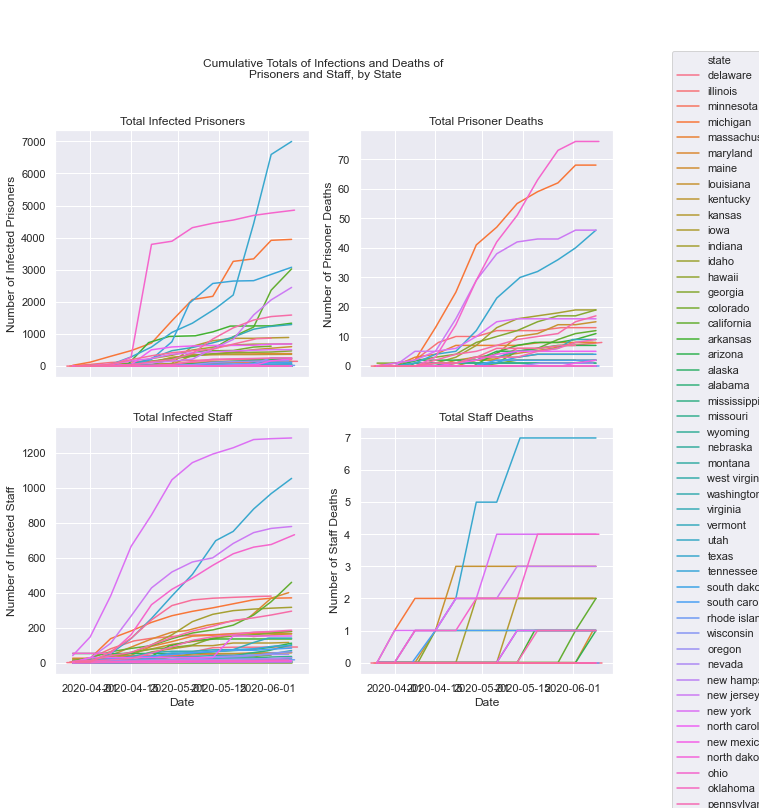

In [21]:
cum_vars_labels = [("total_prisoner_cases", "Number of Infected Prisoners", "Total Infected Prisoners"),
                   ("total_prisoner_deaths", "Number of Prisoner Deaths", "Total Prisoner Deaths"),
                   ("total_staff_cases", "Number of Infected Staff", "Total Infected Staff"),
                   ("total_staff_deaths", "Number of Staff Deaths", "Total Staff Deaths")]


## Plot Total Inmate and Staff Cases and Deaths over Time, by State
plotting.make_time_plot(df, cum_vars_labels, "state", 
                        "Cumulative Totals of Infections and Deaths of \nPrisoners and Staff, by State")

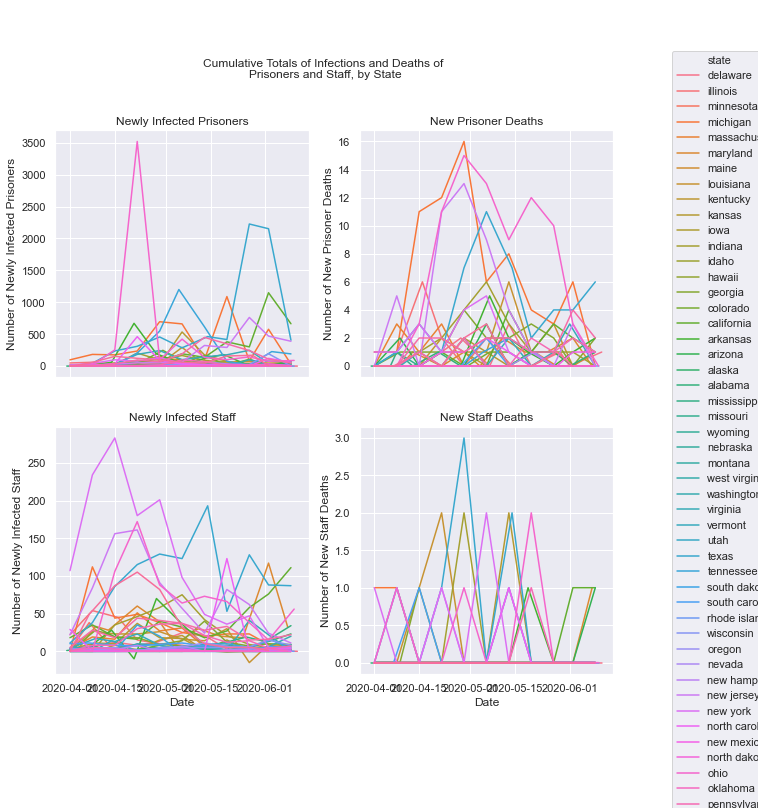

In [22]:
new_vars_labels = [("new_prisoner_cases", "Number of Newly Infected Prisoners", "Newly Infected Prisoners"),
                   ("new_prisoner_deaths", "Number of New Prisoner Deaths", "New Prisoner Deaths"),
                   ("new_staff_cases", "Number of Newly Infected Staff", "Newly Infected Staff"),
                   ("new_staff_deaths", "Number of New Staff Deaths", "New Staff Deaths")]

## Plot Total Inmate Cases over Time, by State
plotting.make_time_plot(df, new_vars_labels, "state", 
               "Cumulative Totals of Infections and Deaths of \nPrisoners and Staff, by State")

Based on the shape of the data, it looks like linear regression, polynomial regression may be good models to use. 

### Next, one-hot encode the state variables, to try and account for state fixed effects.

In [23]:
dataset = clean_data.one_hot_encode(df, ["state"])

print(df.shape)
print(dataset.shape)

(600, 28)
(600, 77)


### Sort the data by effective date, to get the data into time-series form.

In [24]:
dataset.sort_values(by='as_of_date', inplace=True)

dataset = dataset.dropna(subset=["as_of_date"])
dataset.index = range(0, len(dataset))

dataset.head(15)

,total_staff_cases,total_prisoner_cases,staff_recovered,prisoners_recovered,total_staff_deaths,total_prisoner_deaths,as_of_date,pop_2020,pop_2018,capacity,pct_occup,no_visits,lawyer_access,phone_access,video_access,no_volunteers,limiting_movement,screening,healthcare_support,new_staff_cases,new_prisoner_cases,new_staff_deaths,new_prisoner_deaths,lag_staff_cases,lag_prisoner_cases,lag_staff_deaths,lag_prisoner_deaths,state_alabama,state_alaska,state_arizona,state_arkansas,state_california,state_colorado,state_connecticut,state_delaware,state_florida,state_georgia,state_hawaii,state_idaho,state_illinois,state_indiana,state_iowa,state_kansas,state_kentucky,state_louisiana,state_maine,state_maryland,state_massachusetts,state_michigan,state_minnesota,state_mississippi,state_missouri,state_montana,state_nebraska,state_nevada,state_new_hampshire,state_new_jersey,state_new_mexico,state_new_york,state_north_carolina,state_north_dakota,state_ohio,state_oklahoma,state_oregon,state_pennsylvania,state_rhode_island,state_south_carolina,state_south_dakota,state_tennessee,state_texas,state_utah,state_vermont,state_virginia,state_washington,state_west_virginia,state_wisconsin,state_wyoming
0,0.0,0.0,53.0,132.0,0.0,0.0,2020-03-24,5582.0,5582.0,5566.0,1.002875,1,1,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,142.0,185.0,0.0,0.0,2020-03-25,37000.0,39392.0,51329.0,0.767441,1,1,1,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,NaN,0.0,0.0,0.0,2020-03-26,2053.0,2053.0,2116.0,0.970227,1,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.0,1.0,12.0,18.0,0.0,0.0,2020-03-26,30335.0,30335.0,31320.0,0.968550,1,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3.0,0.0,NaN,NaN,0.0,0.0,2020-03-26,10061.0,10061.0,11839.0,0.849818,1,1,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1.0,0.0,10.0,8.0,0.0,0.0,2020-03-26,20875.0,20875.0,22176.0,0.941333,1,0,1,0,1,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0.0,0.0,11.0,2.0,0.0,0.0,2020-03-26,4235.0,4235.0,4838.0,0.875362,1,0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,52.0,0.0,59.0,52.0,0.0,0.0,2020-03-26,41937.0,41937.0,41447.0,1.011822,1,0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0.0,0.0,101.0,910.0,0.0,0.0,2020-03-26,15578.0,15578.0,16120.0,0.966377,1,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,9.0,1.0,142.0,272.0,0.0,0.0,2020-03-26,114000.0,117937.0,122302.0,0.964310,1,1,1,0,0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


The data is now sorted by effective date, and ready to be split temporally for training, testing, and cross-validation.

### Finally, we split the data into training and testing set, then further split the training data into cross validation sets. 

#### First, we split the data into training and testing sets. 

In [25]:
latest_week = dataset["as_of_date"].iloc[-1].week
latest_week

24

In [26]:
train = dataset.loc[dataset["as_of_date"].dt.week < latest_week].copy()
test = dataset.loc[dataset["as_of_date"].dt.week == latest_week].copy()

print(train.shape)
train

(551, 77)


,total_staff_cases,total_prisoner_cases,staff_recovered,prisoners_recovered,total_staff_deaths,total_prisoner_deaths,as_of_date,pop_2020,pop_2018,capacity,pct_occup,no_visits,lawyer_access,phone_access,video_access,no_volunteers,limiting_movement,screening,healthcare_support,new_staff_cases,new_prisoner_cases,new_staff_deaths,new_prisoner_deaths,lag_staff_cases,lag_prisoner_cases,lag_staff_deaths,lag_prisoner_deaths,state_alabama,state_alaska,state_arizona,state_arkansas,state_california,state_colorado,state_connecticut,state_delaware,state_florida,state_georgia,state_hawaii,state_idaho,state_illinois,state_indiana,state_iowa,state_kansas,state_kentucky,state_louisiana,state_maine,state_maryland,state_massachusetts,state_michigan,state_minnesota,state_mississippi,state_missouri,state_montana,state_nebraska,state_nevada,state_new_hampshire,state_new_jersey,state_new_mexico,state_new_york,state_north_carolina,state_north_dakota,state_ohio,state_oklahoma,state_oregon,state_pennsylvania,state_rhode_island,state_south_carolina,state_south_dakota,state_tennessee,state_texas,state_utah,state_vermont,state_virginia,state_washington,state_west_virginia,state_wisconsin,state_wyoming
0,0.0,0.0,53.0,132.0,0.0,0.0,2020-03-24,5582.0,5582.0,5566.0,1.002875,1,1,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,142.0,185.0,0.0,0.0,2020-03-25,37000.0,39392.0,51329.0,0.767441,1,1,1,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,NaN,0.0,0.0,0.0,2020-03-26,2053.0,2053.0,2116.0,0.970227,1,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.0,1.0,12.0,18.0,0.0,0.0,2020-03-26,30335.0,30335.0,31320.0,0.968550,1,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3.0,0.0,NaN,NaN,0.0,0.0,2020-03-26,10061.0,10061.0,11839.0,0.849818,1,1,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,368.0,186.0,211.0,51.0,0.0,8.0,2020-06-02,19050.0,19180.0,21072.0,0.910213,1,1,0,0,1,0,0,0,117.0,41.0,0.0,2.0,251.0,145.0,0.0,6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
547,165.0,390.0,158.0,339.0,0.0,8.0,2020-06-02,7697.0,8454.0,10208.0,0.828174,1,1,0,0,0,0,0,0,0.0,10.0,0.0,0.0,165.0,380.0,0.0,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
548,94.0,2888.0,61.0,2652.0,0.0,4.0,2020-06-03,11937.0,11937.0,15585.0,0.765929,1,0,1,0,0,0,0,0,15.0,227.0,0.0,0.0,79.0,2661.0,0.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
549,11.0,2.0,11.0,2.0,0.0,0.0,2020-06-03,4235.0,4235.0,4838.0,0.875362,1,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,11.0,2.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
print(test.shape)
test.head()

(47, 77)


,total_staff_cases,total_prisoner_cases,staff_recovered,prisoners_recovered,total_staff_deaths,total_prisoner_deaths,as_of_date,pop_2020,pop_2018,capacity,pct_occup,no_visits,lawyer_access,phone_access,video_access,no_volunteers,limiting_movement,screening,healthcare_support,new_staff_cases,new_prisoner_cases,new_staff_deaths,new_prisoner_deaths,lag_staff_cases,lag_prisoner_cases,lag_staff_deaths,lag_prisoner_deaths,state_alabama,state_alaska,state_arizona,state_arkansas,state_california,state_colorado,state_connecticut,state_delaware,state_florida,state_georgia,state_hawaii,state_idaho,state_illinois,state_indiana,state_iowa,state_kansas,state_kentucky,state_louisiana,state_maine,state_maryland,state_massachusetts,state_michigan,state_minnesota,state_mississippi,state_missouri,state_montana,state_nebraska,state_nevada,state_new_hampshire,state_new_jersey,state_new_mexico,state_new_york,state_north_carolina,state_north_dakota,state_ohio,state_oklahoma,state_oregon,state_pennsylvania,state_rhode_island,state_south_carolina,state_south_dakota,state_tennessee,state_texas,state_utah,state_vermont,state_virginia,state_washington,state_west_virginia,state_wisconsin,state_wyoming
551,14.0,2.0,NaN,1.0,0.0,0.0,2020-06-08,24562.0,19968.0,19614.0,1.018048,1,0,1,1,0,0,0,0,0.0,0.0,0.0,0.0,14.0,2.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
552,47.0,167.0,29.0,123.0,0.0,1.0,2020-06-08,14707.0,14707.0,15612.0,0.942032,1,0,1,0,0,0,0,0,1.0,2.0,0.0,0.0,46.0,165.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
553,115.0,891.0,68.0,858.0,2.0,4.0,2020-06-08,9938.0,9938.0,9916.0,1.002219,1,1,1,1,0,0,0,0,3.0,12.0,0.0,0.0,112.0,879.0,2.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
554,400.0,234.0,230.0,51.0,1.0,8.0,2020-06-08,19050.0,19180.0,21072.0,0.910213,1,1,0,0,1,0,0,0,32.0,48.0,1.0,0.0,368.0,186.0,0.0,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
555,370.0,3948.0,308.0,2236.0,2.0,68.0,2020-06-09,38761.0,38761.0,39702.0,0.976298,1,0,1,0,1,1,0,0,2.0,30.0,0.0,0.0,368.0,3918.0,2.0,68.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Our hold-out set for testing is the final week of data. The rest of the data is in the training set. 

#### Next, we split the data to perform temporal cross-validation. We will split the training data into week-long pieces, and use each piece to predict the next, cumulatively. This process will help us tune the hyperparameters in our various models, to try and establish the best predictor. 

So, for instance, week 1 will predict week 2. Then weeks 1 and 2 will predict week 3. Then weeks 1, 2, and 3 will predict week 4. And so on. Eventually, the entire data set, minus the final week, will predict the most recent week. 

In [28]:
earliest_train = train["as_of_date"].iloc[0].week
latest_train = train["as_of_date"].iloc[-1].week

print("the earliest training week is", earliest_train)
print("the latest training week is", latest_train)

the earliest training week is 13
the latest training week is 23


In [29]:
train_cv_splits = []

earliest = train["as_of_date"].iloc[0].week
latest = train["as_of_date"].iloc[-1].week

## Ignore first week; the "lag" and "new_cases" data are all missing 
## because there's no data before the first week of data. Start the
## temporal cross validation with week 2 of data predicting week 3 of data.
for week in range(earliest + 1, latest):
    cv_train = train.loc[(train['as_of_date'].dt.week <= week) &
                         (train['as_of_date'].dt.week != earliest)].copy()
    cv_test = train.loc[train['as_of_date'].dt.week == week + 1].copy()       
    train_cv_splits.append({'test_week': week + 1,
                            'train': cv_train,
                            'test': cv_test})

In [30]:
## To demonstrate the growing training set for each temporal split, print the sizes of 
## the splits. 
for cv in train_cv_splits:
    print("test week is:", cv['test_week'],
          "\nshape of training is:", cv['train'].shape,
          "\nshape of test is", cv['test'].shape)

test week is: 15 
shape of training is: (49, 77) 
shape of test is (51, 77)
test week is: 16 
shape of training is: (100, 77) 
shape of test is (50, 77)
test week is: 17 
shape of training is: (150, 77) 
shape of test is (50, 77)
test week is: 18 
shape of training is: (200, 77) 
shape of test is (51, 77)
test week is: 19 
shape of training is: (251, 77) 
shape of test is (50, 77)
test week is: 20 
shape of training is: (301, 77) 
shape of test is (49, 77)
test week is: 21 
shape of training is: (350, 77) 
shape of test is (50, 77)
test week is: 22 
shape of training is: (400, 77) 
shape of test is (50, 77)
test week is: 23 
shape of training is: (450, 77) 
shape of test is (51, 77)


## SECTION III: CROSS-VALIDATION AND MODEL SELECTION

We will run a temporal cross validation process on a variety of models and features. We will use each of the cross validations splits to cumulatively predict the data in the next split. We will then look at the error produced by each model to determine the best performing model type, the best performing hyperparameters for that model, and the most important features for our model. From this output, we will take that best model and best hyperparameters and use them to train a final model, which will we use to predict our testing data. 

#### First, set up parameters to run a grid search on the different models and hyperparameters. Import the module that runs cross-validation and ML analysis. 

In [31]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
import ph_analysis as pha

FEATURES = {'naive': ['lag_prisoner_cases', 'new_prisoner_cases'],
            'population': ['pop_2020', 'pop_2018', 'capacity', 'pct_occup', 
                           'lag_prisoner_cases', 'new_prisoner_cases'],
            'policy': ['no_visits', 'lawyer_access', 'phone_access', 
                       'video_access', 'no_volunteers', 'limiting_movement', 
                       'screening', 'healthcare_support', 'lag_prisoner_cases',
                       'new_prisoner_cases'],
            'total': ['pop_2020', 'pop_2018', 'capacity', 'pct_occup', 
                      'no_visits', 'lawyer_access', 'phone_access', 
                      'video_access', 'no_volunteers', 'limiting_movement', 
                      'screening', 'healthcare_support', 'lag_prisoner_cases',
                      'new_prisoner_cases']}

STATES = [col for col in train.columns if 'state' in col]

TARGET = 'total_prisoner_cases'

DEGREES = [1, 2, 3]

MODELS = {'LinearRegression': linear_model.LinearRegression(),
    'Lasso': linear_model.Lasso(),
    'Ridge': linear_model.Ridge(),
    'ElasticNet': linear_model.ElasticNet()}


GRID = {'LinearRegression': [{'normalize': False, 'fit_intercept': True}],
        'Lasso': [{'alpha': x, 'random_state': 0} \
                  for x in (0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000)],
        'Ridge': [{'alpha': x, 'random_state': 0} \
                  for x in (0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000)],
        'ElasticNet': [{'alpha': x, 'random_state': 0} \
                  for x in (0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000)]}  

#### Next, perform cross validation predicting total prisoner cases of COVID with a naive model: the only feature is the number of infections from the previous week. 

Note, in doing so, we lose the first week of data - we have no data on cases before the first week in our dataset. 

In [32]:
degrees = [1, 2, 3]
naive_features = ['lag_prisoner_cases']
target = 'total_prisoner_cases'

In [33]:
naive_cv_df = pha.cross_validate(train_cv_splits, naive_features + STATES, target, degrees, MODELS, GRID)
naive_cv_df.head(30)

,model,mse,mae,rss,run_time,parameters,model_type,test_week,degree
0,"LinearRegression degree_1 {'normalize': False,...",1563.437667,13.274257,7.973532e+04,00:00:00.458703,"{'normalize': False, 'fit_intercept': True}",LinearRegression(),15,1
1,"Lasso degree_1 {'alpha': 0.001, 'random_state'...",1872.303604,14.218008,9.548748e+04,00:00:00.006105,"{'alpha': 0.001, 'random_state': 0}","Lasso(alpha=0.001, random_state=0)",15,1
2,"Lasso degree_1 {'alpha': 0.01, 'random_state': 0}",1219.987347,12.089448,6.221935e+04,00:00:00.008456,"{'alpha': 0.01, 'random_state': 0}","Lasso(alpha=0.01, random_state=0)",15,1
3,"Lasso degree_1 {'alpha': 0.1, 'random_state': 0}",2117.142822,15.047586,1.079743e+05,00:00:00.005008,"{'alpha': 0.1, 'random_state': 0}","Lasso(alpha=0.1, random_state=0)",15,1
4,"Lasso degree_1 {'alpha': 1, 'random_state': 0}",1143.075110,12.409429,5.829683e+04,00:00:00.002896,"{'alpha': 1, 'random_state': 0}","Lasso(alpha=1, random_state=0)",15,1
5,"Lasso degree_1 {'alpha': 10, 'random_state': 0}",246.636756,8.041536,1.257847e+04,00:00:00.003394,"{'alpha': 10, 'random_state': 0}","Lasso(alpha=10, random_state=0)",15,1
6,"Lasso degree_1 {'alpha': 100, 'random_state': 0}",2211.992029,17.446178,1.128116e+05,00:00:00.003152,"{'alpha': 100, 'random_state': 0}","Lasso(alpha=100, random_state=0)",15,1
7,"Lasso degree_1 {'alpha': 1000, 'random_state': 0}",2211.992029,17.446178,1.128116e+05,00:00:00.002305,"{'alpha': 1000, 'random_state': 0}","Lasso(alpha=1000, random_state=0)",15,1
8,"Lasso degree_1 {'alpha': 10000, 'random_state'...",2211.992029,17.446178,1.128116e+05,00:00:00.003338,"{'alpha': 10000, 'random_state': 0}","Lasso(alpha=10000, random_state=0)",15,1
9,"Ridge degree_1 {'alpha': 0.001, 'random_state'...",1731.148643,13.798801,8.828858e+04,00:00:00.006875,"{'alpha': 0.001, 'random_state': 0}","Ridge(alpha=0.001, random_state=0)",15,1


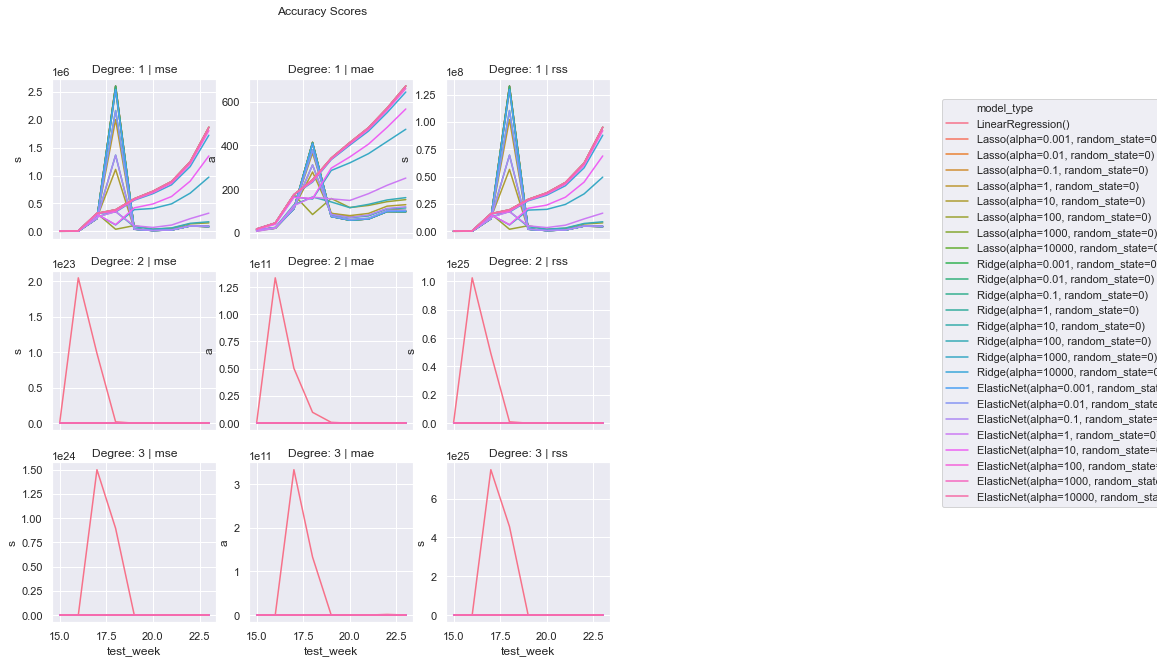

In [34]:
accuracy_metrics = ['mse', 'mae', 'rss']
plotting.graph_cv_scores(naive_cv_df, accuracy_metrics, 'model_type', 'Accuracy Scores')

In [35]:
pd.set_option('display.max_colwidth', 1000)
best_naive = pha.find_best_model(naive_cv_df)
best_naive

,model,mse,mae,rss,test_week,degree
29,"Lasso degree_1 {'alpha': 100, 'random_state': 0}",94661.293534,112.473511,4.749896e+06,19,1
55,"Ridge degree_1 {'alpha': 10, 'random_state': 0}",206448.594041,100.918879,1.048222e+07,19,1
29,"Lasso degree_1 {'alpha': 100, 'random_state': 0}",94661.293534,112.473511,4.749896e+06,19,1


The best model was the Lasso Regression, on a polynomial basis expansion of degree 1. It did the best on two of three metrics; using solely the lag feature to predict future cases, this model had an average mean squared error of 87576.99over all the temporal cross-validation splits, and an average RSS of 3378868 across all the temporal CV splits. 

#### Next, run the same cross-validation process using different sets of features in addition to the naive feature. 

#### Cross-validation on additional features
Using the same above steps, we run this cross-validation multiple times using different sets of features in addition to the naive feature. This will return a dictionary of the best models of each feature set.

In [ ]:
best_models = pha.run_temporal_cv(train_cv_splits)
pd.DataFrame(best_models).transpose()

As we can see in the above DataFrame, the same model (Lasso with params {'alpha': 0.01, 'random_state': 0}) performed consistently across all feature sets.

Most important features in the best model from each feature set:

In [ ]:
feature_importances = pha.compare_feat_import(best_models, train_cv_splits)

In [ ]:
plotting.plot_comp_feature_importance(feature_importances, list(best_models.keys()))

Accuracy scores for the best-performing model using the total feature set:

From the above plot, we see that state fixed effects have a large impact on the total prisoner cases. Additionally, we see that policies (such as screening) have a non-zero impact on predicting the number of COVID cases in prisons.

We will use the best-perfoming model, the Lasso model, and all features for prediction and simulation


In [ ]:
plotting.plot_feature_importance(feature_importances[3])

Graphing the accuracy scores 

In [ ]:
total = pha.FEATURES['total']
states = [col for col in train.columns if 'state' in col]
total_cv_df = pha.cross_validate(train_cv_splits, total + states, target, degrees, MODELS, GRID)

In [ ]:
pha.find_best_model(total_cv_df)

In [ ]:
plotting.graph_cv_scores(total_cv_df, accuracy_metrics, 'model_type', 'Accuracy Scores')

## SECTION IV: Prediction and Evaluation

In this step, we take the best performing model from the cross-validation step, and use it to predict the testing set, using the entirety of the training data. We then evaluate that model's performance against the testing data using the same metrics as in the Cross Validation step. 

### Predicting and evaluating best model and selected feature set on test data set

In [ ]:
pha.predict_and_evaluate(train, test, 'total', best_models, features=FEATURES, target=TARGET)

The MSE, MAE, and RSS are very low in this model. Based on the feature importance graphs in cross-validation, we see that the features `lag_prisoner_cases` and `new_prisoner_cases` have high feature importance in naive models. Here, we observe how our accuracy metrics may change if we remove these features from the model.

### Removing lag_prisoner_cases from the model

In [ ]:
pha.predict_and_evaluate(train, test, 'total', best_models, features=FEATURES, target=TARGET, drop_features=['lag_prisoner_cases'])

### Removing new_prisoner_cases from the model

In [ ]:
pha.predict_and_evaluate(train, test, 'total', best_models, features=FEATURES, target=TARGET, drop_features=['new_prisoner_cases'])

### Removing both lag_prisoner_cases and new_prisoner_cases from the model

In [ ]:
pha.predict_and_evaluate(train, test, 'total', best_models, features=FEATURES, target=TARGET, drop_features=['lag_prisoner_cases', 'new_prisoner_cases'])

As the above graphs and accuracy measures display, prediction accuracy drops significantly when removing at least one of these features from the model. 

Now, we measure feature importance for the selected model.

In [ ]:
X_train, y_train, X_test, y_test = pha.normalize_prep_eval_data(train, test, 'total')

feature_importance = pha.get_feature_importance(MODELS['Lasso'], best_models['total']['params'], FEATURES['total'] + states, X_train, y_train, X_test)
plotting.plot_feature_importance(feature_importance)

## SECTION V: Simulation
Now, we want to apply this model to predict into next week. The purpose of this simulation is to observe how applying
certain interventions _this week_ would impact total predicted cases next week.

In [ ]:
sim_policies = [{'policies': {'no_visits': 0, 'lawyer_access': 0, 'phone_access': 0, 'video_access': 0, 'no_volunteers': 0,
                             'limiting_movement': 0, 'screening': 0, 'healthcare_support': 0, 'pct_occup': 1.5},
                'title': 'Increasing all prison capacities to 150%, remove all policies'},
               {'policies': {'no_visits': 1, 'lawyer_access': 1, 'phone_access': 1, 'video_access': 1, 'no_volunteers': 1,
                             'limiting_movement': 1, 'screening': 1, 'healthcare_support': 1, 'pct_occup': .5},
                'title': 'Decrowd all prison capacities to 50%, institute all policies'},
               {'policies': {'no_visits': 1, 'lawyer_access': 1, 'phone_access': 1, 'video_access': 1, 'no_volunteers': 1,
                             'limiting_movement': 1, 'screening': 1, 'healthcare_support': 1, 'pct_occup': .1},
                'title': 'Decrowd all prison capacities to 10%, institute all policies'},
               {'policies': {'no_visits': 1, 'lawyer_access': 1, 'phone_access': 1, 'video_access': 1, 'no_volunteers': 1,
                             'limiting_movement': 1, 'screening': 1, 'healthcare_support': 1},
                'title': 'Institute all policies, no changes to capacity'}]

plotting.plot_simulations(dataset, sim_policies, 'total', best_models)

### Finally, predicting the number of infections in North Carolina

In [ ]:
pha.pred_north_carolina(X_train, y_train, X_test, y_test, MODELS['Lasso'], best_models['total']['params'])


## SECTION VI: Results/Discussion

The largest limitation of our model is that it is more useful as the beginning of a conversation than as a true predictor. Given the limitations of sparse data; our inability to model the population effects of the pandemic and their interactions with both prisoners and staff in carceral institutions; the non-representative incarcerated population; and our inability to model the intense mental and psychological stress of incarceration (which may display comorbidity with COVID-19), we are unable to test the external validity of our model against other pandemic models. Our model is therefore more useful as a heuristic for discussing the different features in play, and as a rough simulation of potential outcomes, then as an accurate predictor.

Equally - this project shows the limitations of ML predictions without domain knowledge. None of us are epidemiologists, and the mechanics of coding the SEIR model into the ML techniques were beyond our abilities. The viral pathology, the rate of transmission, the prior health of the prison population (indicators on rates of stress, COVID-19 comorbidities), demographic data about the prison population, the movement of non-prisoners through prisons, and the interactions of all our features with each other are not taken into account in our model. Here, a deeper reliance on medical and public health research can only lead to better modeling, with or without the assistance of ML techniques. 
